MAI 103: Análise de Risco  //  Prof. Eber  
Lista 07 //  Data: 24/07/2018  // Entrega: 31/07/2018  
Luis Filipe Kopp

In [2]:
set.seed(1)
library(MASS)
library(triangle)

Warning message:
"package 'MASS' was built under R version 3.3.3"Warning message:
"package 'triangle' was built under R version 3.3.3"

1-<b>Risco de prazo com correlação</b>  

A tabela abaixo mostra a lista de atividades que devem ser executadas para o desenvolvimento de um sistema de informação, composto por quatro módulos.   
Observações:
- Não existem restrições de recursos
- Existe um risco de que os testes de aceitação sejam prorrogados até 7 semanas, no caso que o cliente deseje adiar o pagamento da última fatura.
- Existe uma correlação de 70% entre o esforço de projeto de um módulo e a sua codificação, assim como uma correlação de 50% entre a codificação e teste de um módulo.
- Considera-se que existe uma chance de 30% de que seja necessário um retrabalho após o teste do sistema. 
- Considera-se também que existe uma chance pequena, cerca de 5%, de ser necessário um segundo retrabalho após o primeiro. 
- Além disso, o sistema deverá ser retestado após cada retrabalho.


|Atividade|Dmin|DMprov|DMax|
|---|---|---|---|
|Projeto de Sistema|4|5|7|
|Projeto de módulo (x4)|5|6|7|
|Codificação do módulo (x4)|2|4|5|
|Teste do módulo (x4)|1|3|4|
|Integração|4|5|7|
|Teste do sistema|3|4|5|
|Teste de aceitação|1|2|3|
Tabela 1: Atividades

|Atividade|DMin|DMprov|DMax|
|---|---|---|---|
|Primeiro Retrabalho|4|5|7|
|Segundo retrabalho|5|6|7|
|Teste do sistema após retrabalho|2|4|5|
Tabela 2: Atividades contingenciadas

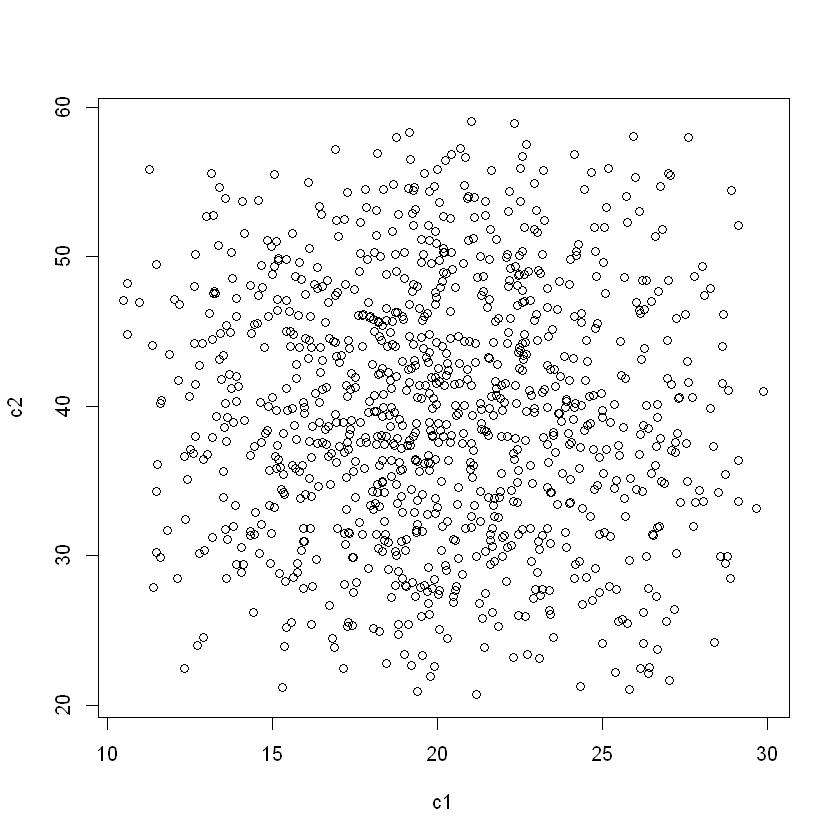

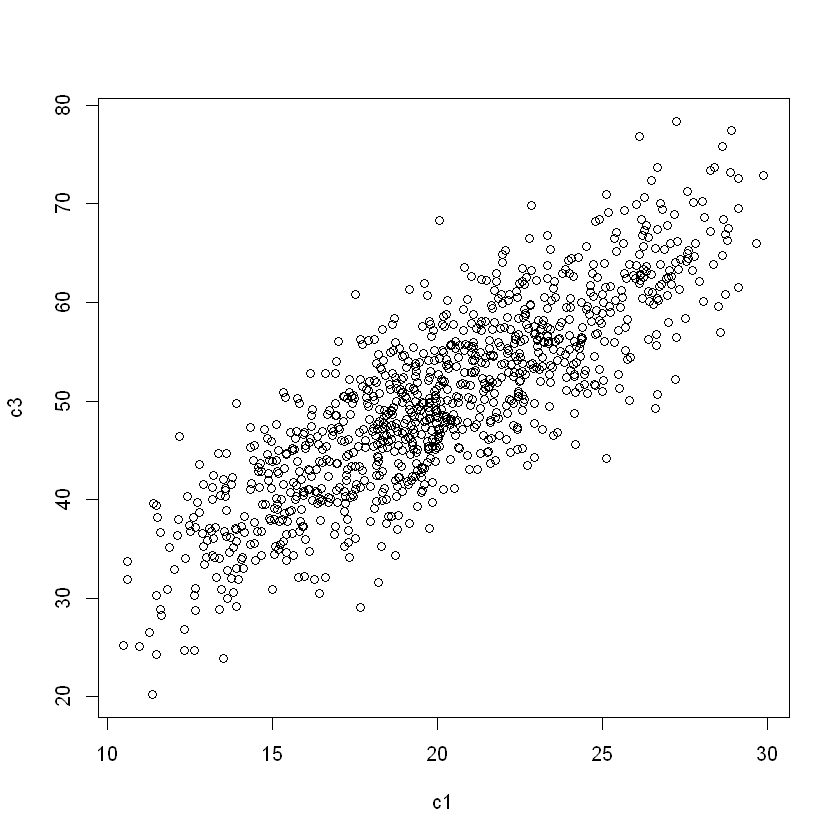

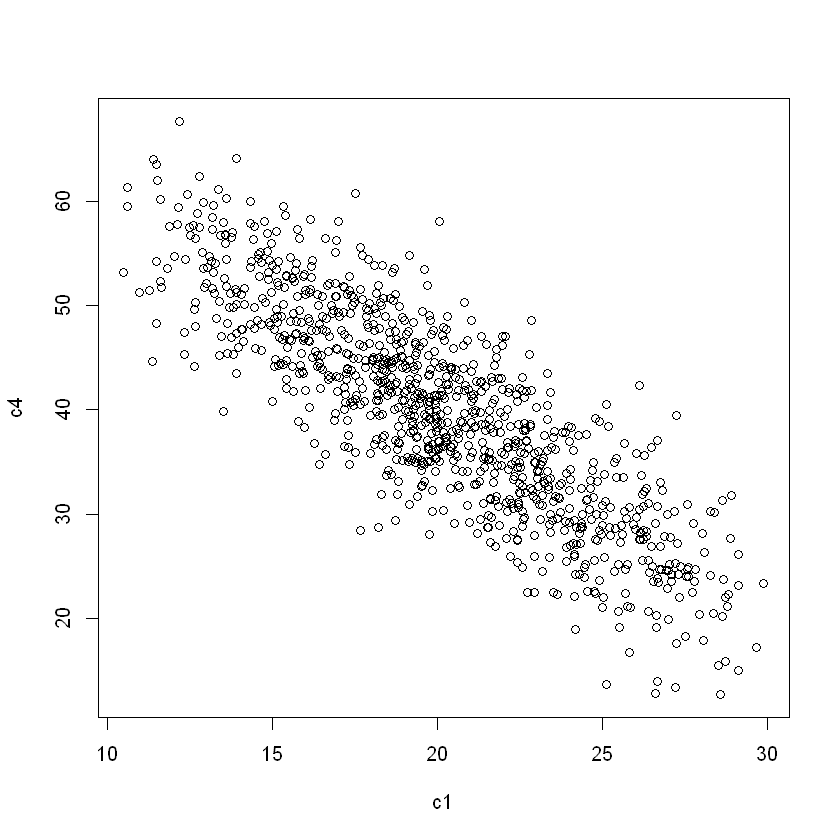

In [4]:
c1 <− rtriangle(1000, 10, 30, 20)
c2 <− rtriangle(1000, 20, 60, 40)
plot(c1, c2)

e1 <− rnorm(1000, 0, 5)
c3 <− 2 ∗ c1 + 10 + e1
plot(c1, c3)

c4 <− 80 − 2 ∗ c1 + e1
plot(c1, c4) 

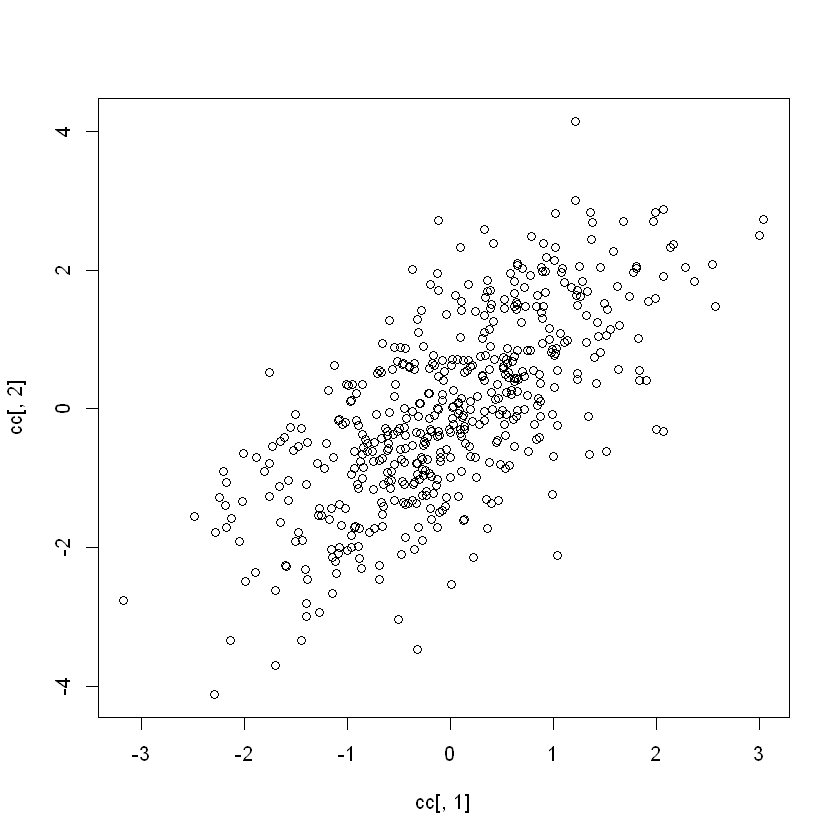

In [9]:
library(MASS)
cormat <− matrix(c(1, 1, 1, 2), ncol = 2)
cc <− mvrnorm(500, mu = c(0, 0), Sigma = cormat)
plot(cc[, 1], cc[, 2])

2 – <b>Risco de prazo com dependência</b>  

Este exercício demonstra um exemplo prático de uma técnica utilizada para modelagem da dependência entre atividades usando tabelas de look-up. Para cada cenário, uma condição de tempo é sorteada para cada uma das tarefas. A tarefas são amostradas de acordo com sua distribuição e corrigidas de acordo com a condição de tempo de sua execução.  

Um prédio deve ser construido perto de um sítio arqueológico. A tabela abaixo motra as atividades a serem desenvolvidas de forma sequencial, uma de cada vez. O lado direito da tabela mostra o impacto (%) na duração de cada atividade devido a cada condição de tempo.


|Atividade|DMin|DMp|DMax|MR|Ruim|Normal|Bom|MB|
|---|---|---|---|---|---|---|---|---|
|Arqueologia|4|4.3|5|40|28|0|0|-2|
|Excavação|9|10.9|12|30|20|0|-6|-10|
|Formas|1.5|2.2|3.2|10|4|0|0|-3|
|Fundação|5|6.7|7.5|40|25|0|-12|-18|
|Paredes|15|16.7|18|10|4|0|0|-2|
|Telhado|6.5|7.6|9|20|8|0|-4|-6|
Tabela 3: Atividades

Os especialistas prevem que as probabilidades de ocorrência de cada tipo de tempo durante a execução da obra são:

|Tempo|Probabilidade|
|---|---|
|MR|0.125|
|Ruim|0.3125|
|Normal|0.25|
|Bom|0.1875|
|MB|0.125|
Table 4: Condições do tempo


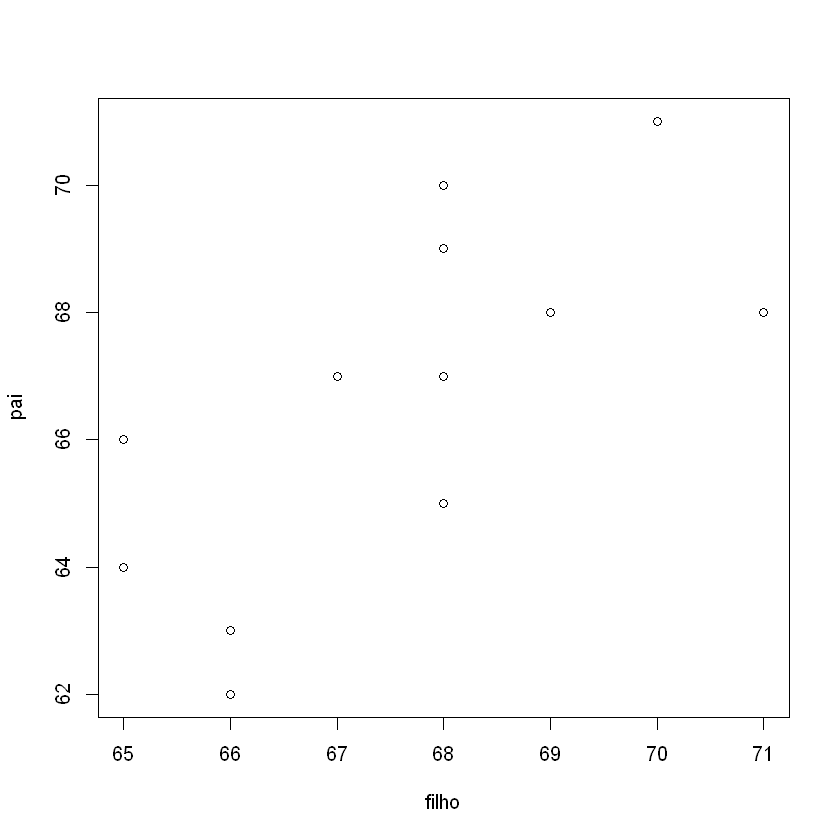

In [65]:
pai <- c(65,63,67,64,68,62,70,66,68,67,69,71)
filho <- c(68,66,68,65,69,66,68,65,71,67,68,70)
plot(filho,pai)


In [19]:
cor(pai,filho)
cov(pai,filho)

[1] 0.7026516

[1] 3.666667

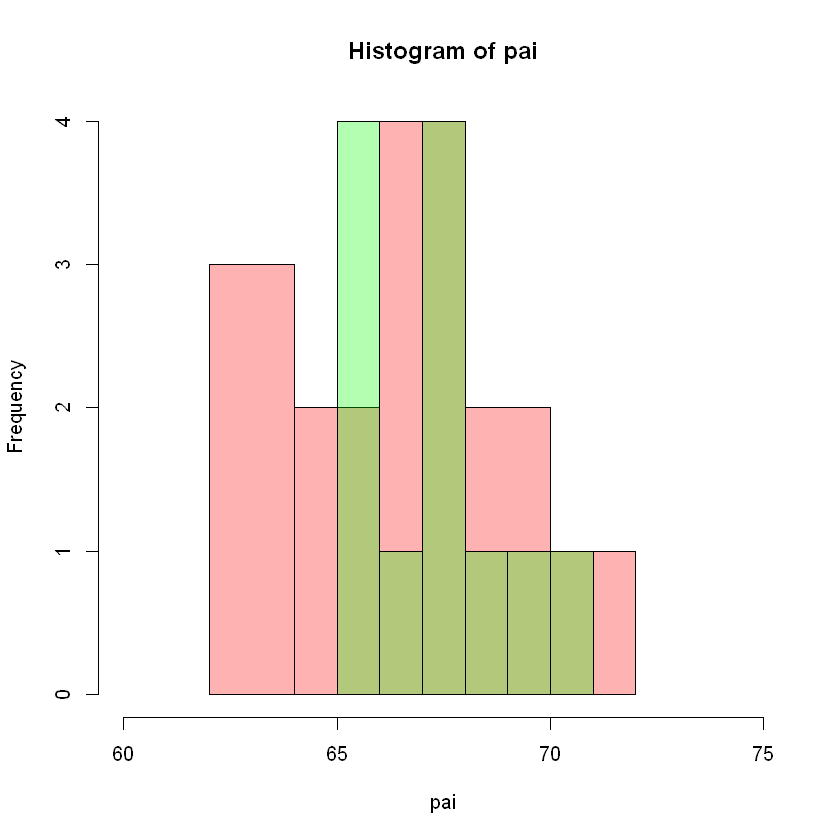

In [34]:
hist(pai, col=rgb(1,0,0,0.3), breaks=5,xlim=c(60,75), freq=T)
hist(filho, col=rgb(0,1,0,0.3), add=T, breaks=5,xlim=c(60,75), freq=T)

In [56]:
m_p_f = mean(pai/filho)
s_p_f = sd(pai/filho)


In [66]:
filho_novo = rnorm(1000,mean(filho),sd(filho))
res2 = rnorm(1000,m_p_f,s_p_f)
pai_novo = filho_novo*res2
cor(filho_novo,pai_novo)
cov(filho_novo,pai_novo)

[1] 0.6979171

[1] 3.592669

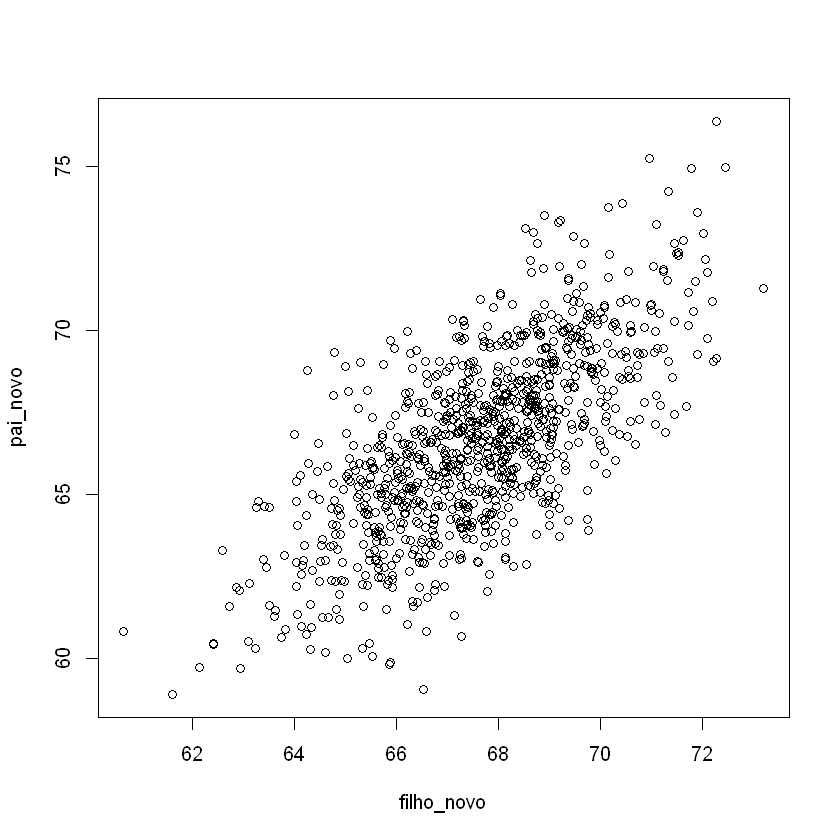

In [84]:
plot(filho_novo,pai_novo)

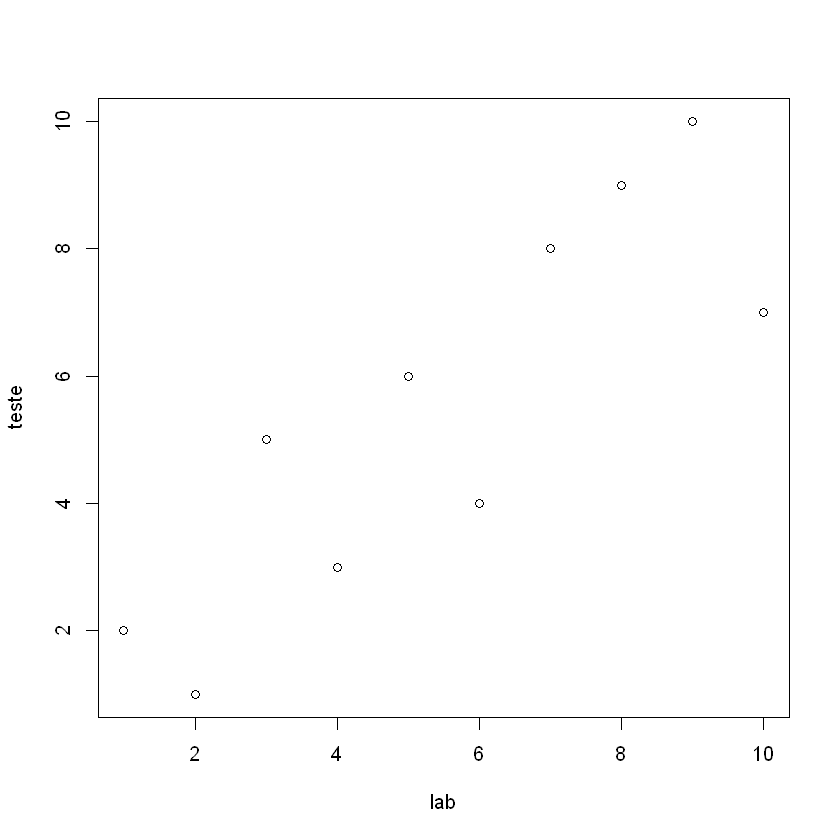

In [68]:
lab <- c(8,3,9,2,7,10,4,6,1,5)
teste <- c(9,5,10,1,8,7,3,4,2,6)
plot(lab,teste)

[1] 0.8545455

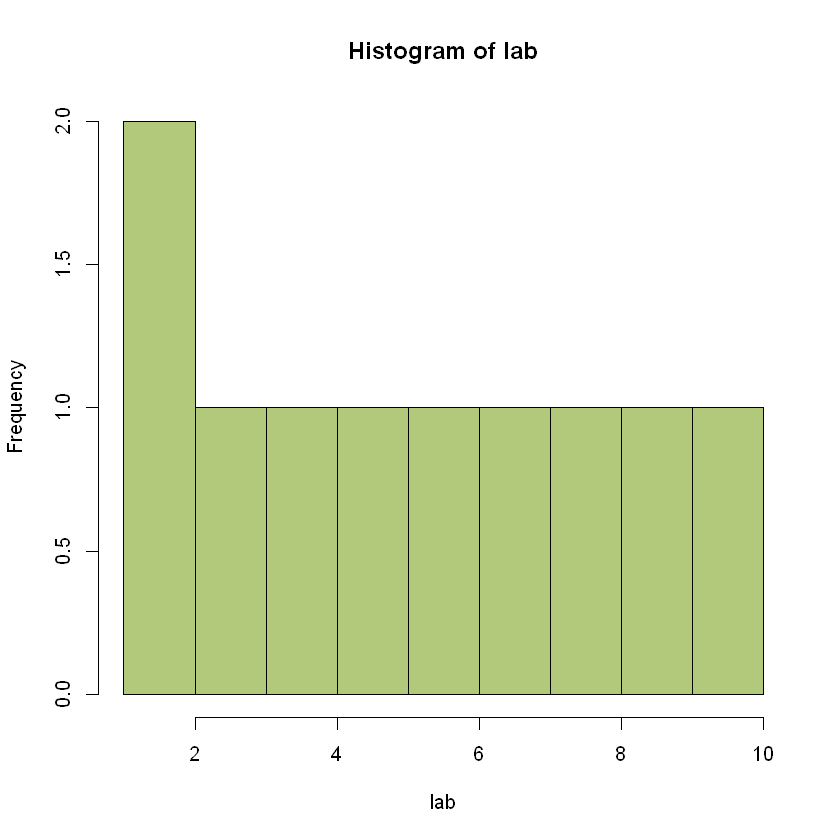

In [74]:
cor(lab,teste)
hist(lab, col=rgb(1,0,0,.3), breaks=10)
hist(teste, add=T, col=rgb(0,1,0,.3), breaks=10)

In [76]:
cov(lab,teste)

[1] 7.833333

In [80]:
cov(lab,teste, use = "everything", method ="pearson")
cov(lab,teste, use = "everything", method ="kendall")
cov(lab,teste, use = "everything", method ="spearman")

[1] 7.833333

[1] 62

[1] 7.833333

In [85]:
cor(lab,teste, use = "everything", method ="pearson")
cor(lab,teste, use = "everything", method ="kendall")
cor(lab,teste, use = "everything", method ="spearman")

[1] 0.8545455

[1] 0.6888889

[1] 0.8545455

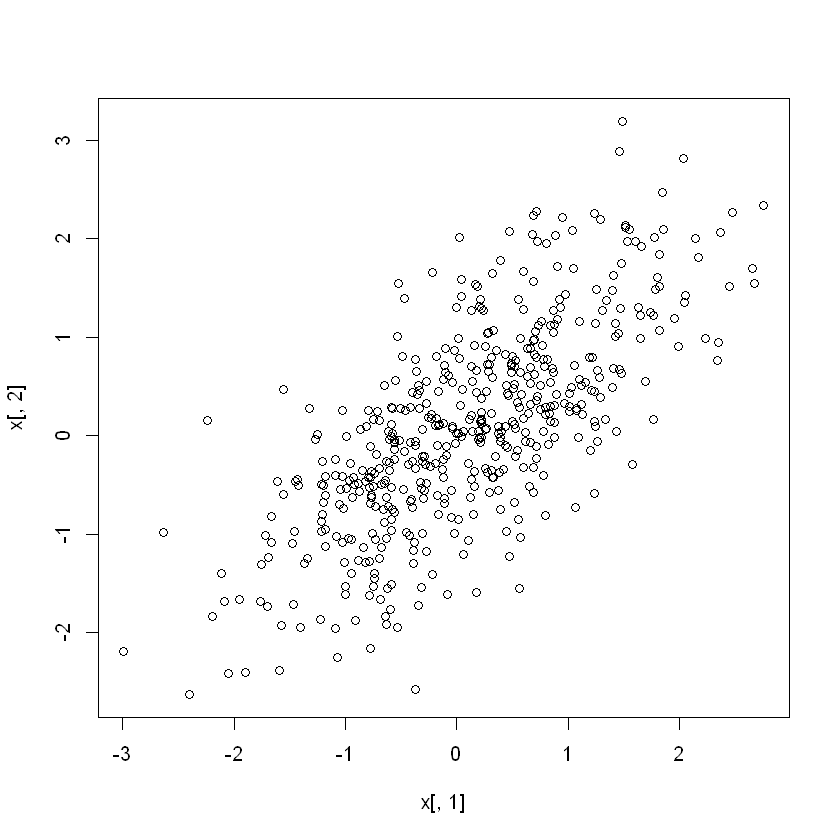

In [95]:
x <− mvrnorm(500,mu=c(0,0,0),Sigma=matrix(c(1,.7,.5,.7,1,.5,-.5,-.5,1),ncol=3))
plot(x[,1],x[,2])

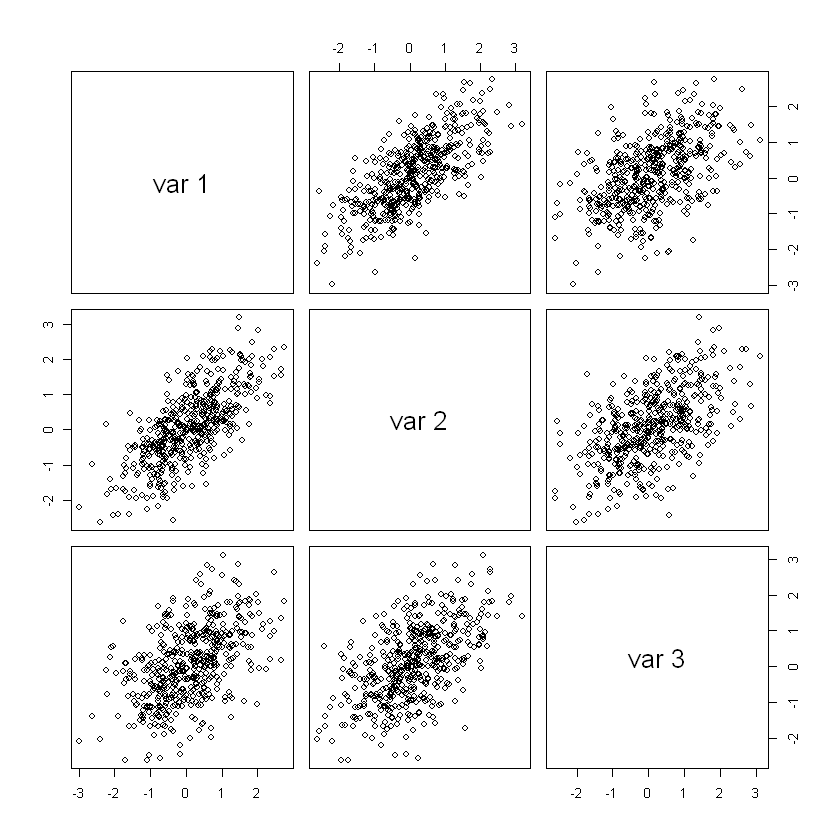

In [98]:
pairs(x)